**Kerjakan tugas-tugas dibawah ini: **

*Impor data "UCI_Credit_Card.csv"

*Lakukan EDA dan visualisasi (jangan ragu untuk memilih visualisasi data yang menurut anda paling tepat)

*Persiapkan data untuk pelatihan model dan pisahkan menjadi data latih dan uji

*Latih dan evaluasi model klasifikasi XG-Boost

*Latih dan evaluasi model klasifikasi Support Vector Machine

*Latih dan evaluasi model klasifikasi Naive Bayes

*Latih dan evaluasi model klasifikasi Logistic Regression

*Latih dan evaluasi model klasifikasi Random Forest

*Latih dan evaluasi model klasifikasi K-Nearest Neighbors

*Plot kurva ROC untuk seluruh model dan hitung nilai AUC

*Model mana yang berkinerja paling baik?





In [1]:
#IMPORT LIBRARY
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

In [2]:
#Impor data "UCI_Credit_Card.csv"
credit_card_df = pd.read_csv("UCI_Credit_Card.csv")
credit_card_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [3]:
#Lakukan EDA dan visualisasi
credit_card_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
credit_card_df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [5]:
credit_card_df.shape

(30000, 25)

In [6]:
credit_card_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [7]:
credit_card_df.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [8]:
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [9]:
credit_card_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


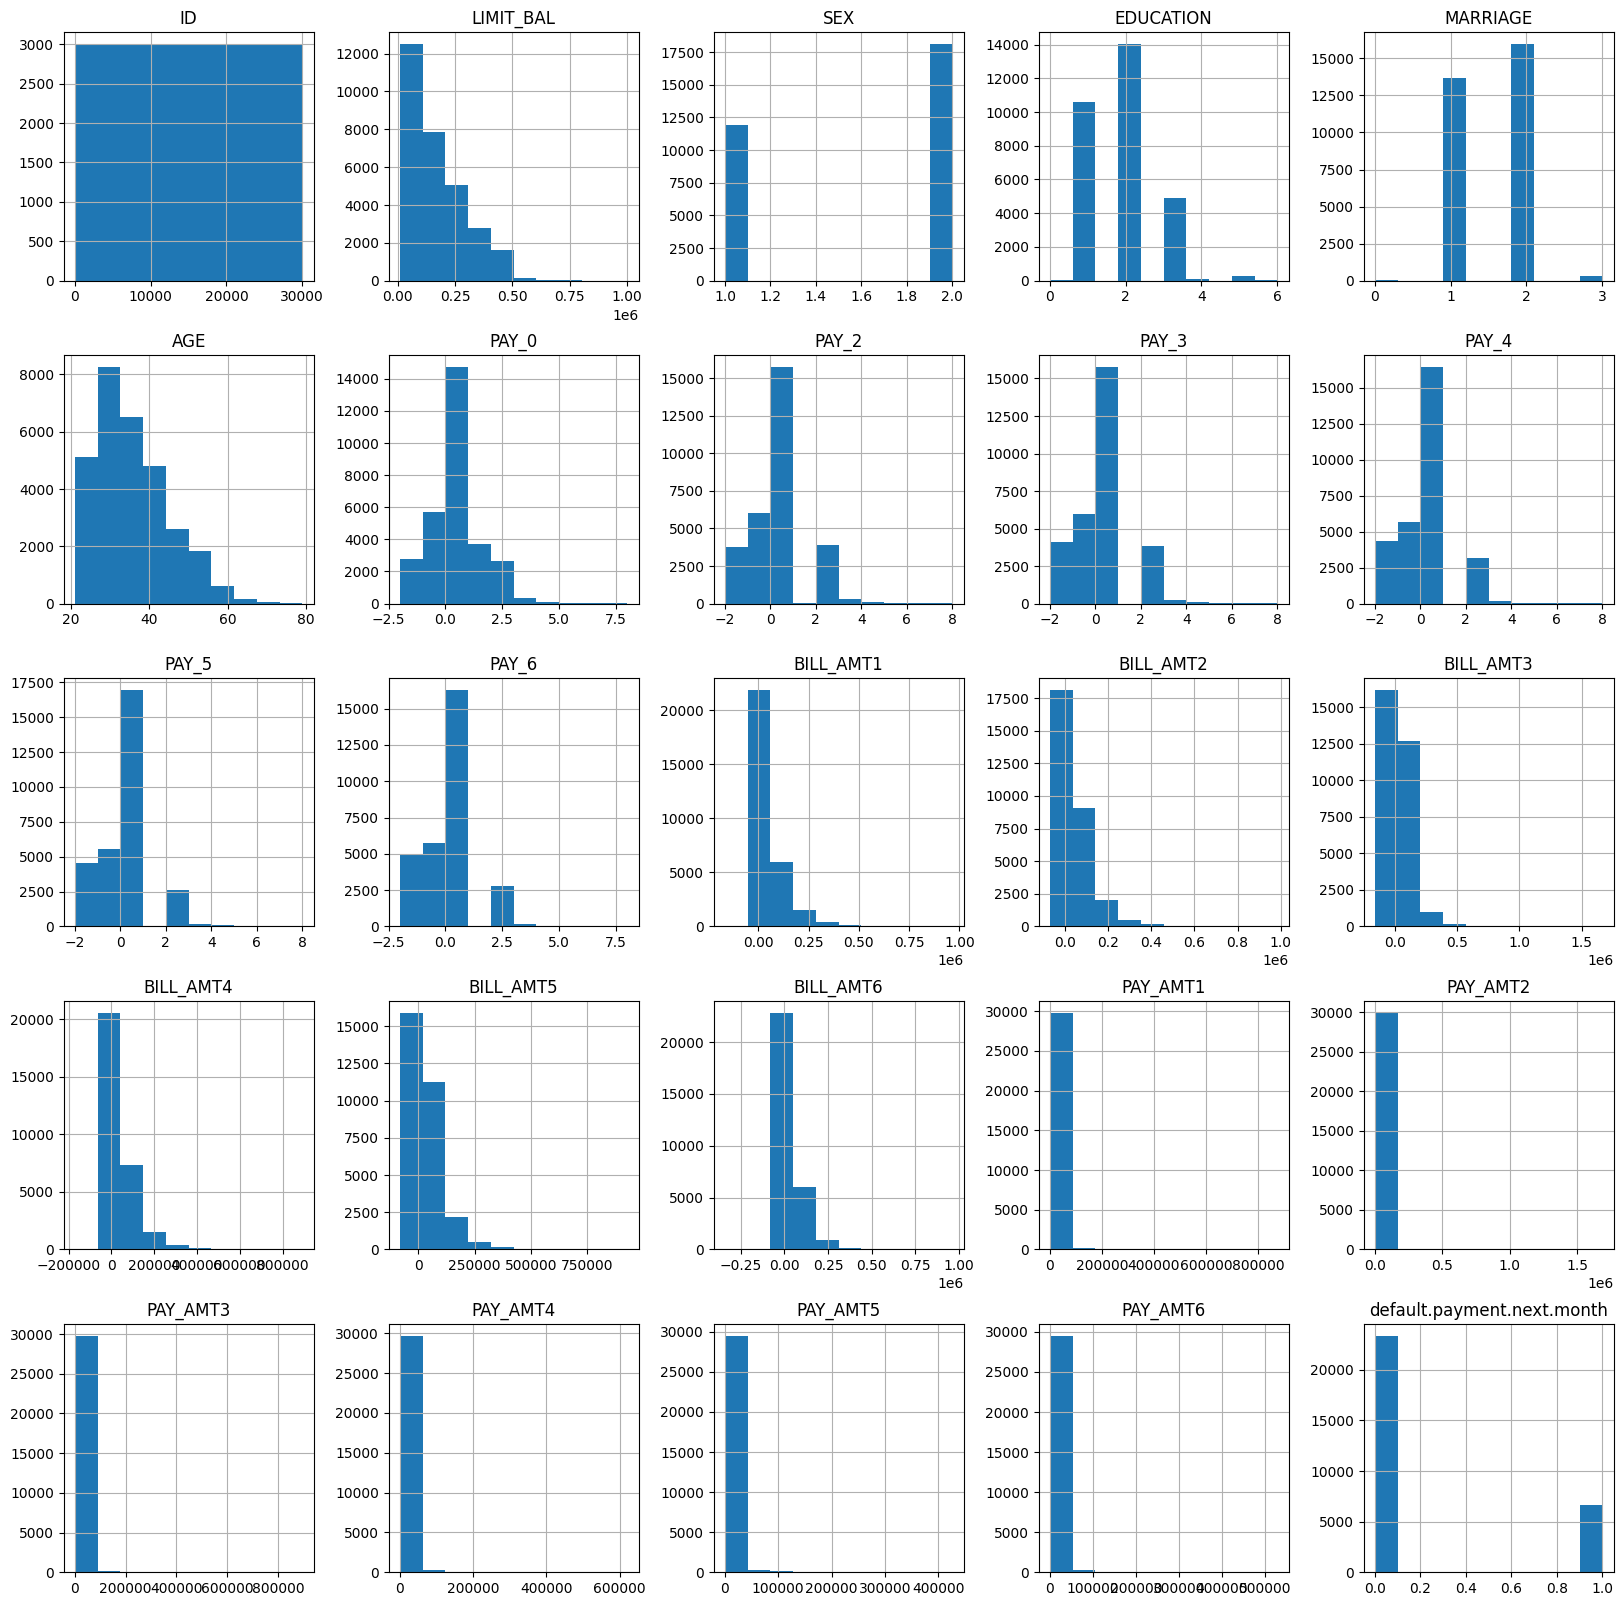

In [10]:
credit_card_df.hist(figsize = (20,20))
plt.show()

In [11]:
#Persiapkan data untuk pelatihan model dan pisahkan menjadi data latih dan uji
#buang kolom id
credit_card_df.drop(['ID'], axis = 1, inplace = True)
credit_card_df['default.payment.next.month'].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [12]:
#0 = default payment next month
#1 = non default payment next month

In [13]:
#memisahkan data default dan non default
cc_default_df = credit_card_df[credit_card_df['default.payment.next.month'] == 1]
cc_nodefault_df = credit_card_df[credit_card_df['default.payment.next.month'] == 0]

In [14]:
cc_default_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
13,70000.0,1,2,2,30,1,2,2,0,0,...,66782.0,36137.0,36894.0,3200.0,0.0,3000.0,3000.0,1500.0,0.0,1
16,20000.0,1,1,2,24,0,0,2,2,2,...,18338.0,17905.0,19104.0,3200.0,0.0,1500.0,0.0,1650.0,0.0,1
21,120000.0,2,2,1,39,-1,-1,-1,-1,-1,...,0.0,632.0,316.0,316.0,316.0,0.0,632.0,316.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29991,210000.0,1,2,1,34,3,2,2,2,2,...,2500.0,2500.0,2500.0,0.0,0.0,0.0,0.0,0.0,0.0,1
29994,80000.0,1,2,2,34,2,2,2,2,2,...,77519.0,82607.0,81158.0,7000.0,3500.0,0.0,7000.0,0.0,4000.0,1
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [15]:
cc_nodefault_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,50000.0,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,500000.0,1,1,2,29,0,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29990,140000.0,1,2,1,41,0,0,0,0,0,...,138262.0,49675.0,46121.0,6000.0,7000.0,4228.0,1505.0,2000.0,2000.0,0
29992,10000.0,1,3,1,43,0,0,0,-2,-2,...,0.0,0.0,0.0,2000.0,0.0,0.0,0.0,0.0,0.0,0
29993,100000.0,1,1,2,38,0,-1,-1,0,0,...,70626.0,69473.0,55004.0,2000.0,111784.0,4000.0,3000.0,2000.0,2000.0,0
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0


In [16]:
#kumpulan data tidak seimbang karna untuk cc_default_df terdapat 6.636 sedangkan untuk cc_nodefault_df 23.364
cc_default_df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,...,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.0
mean,130109.656420,1.567058,1.894665,1.528029,35.725738,0.668174,0.458258,0.362116,0.254521,0.167872,...,42036.950573,39540.190476,38271.435503,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068,1.0
std,115378.540571,0.495520,0.728096,0.525433,9.693438,1.383252,1.502243,1.499401,1.508535,1.482833,...,64351.076092,61424.695949,59579.674268,9544.252427,11737.986064,12959.624486,11191.973162,11944.731175,13464.005894,0.0
min,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-65167.000000,-53007.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,...,2141.500000,1502.750000,1150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,90000.000000,2.000000,2.000000,2.000000,34.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,19119.500000,18478.500000,18028.500000,1636.000000,1533.500000,1222.000000,1000.000000,1000.000000,1000.000000,1.0
75%,200000.000000,2.000000,2.000000,2.000000,42.000000,2.000000,2.000000,2.000000,2.000000,0.000000,...,50175.750000,47853.000000,47424.000000,3478.250000,3309.750000,3000.000000,2939.250000,3000.000000,2974.500000,1.0
max,740000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,7.000000,8.000000,8.000000,8.000000,...,548020.000000,547880.000000,514975.000000,300000.000000,358689.000000,508229.000000,432130.000000,332000.000000,345293.000000,1.0


In [17]:
cc_nodefault_df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,...,23364.000000,23364.000000,23364.000000,23364.000000,2.336400e+04,23364.000000,23364.000000,23364.000000,23364.000000,23364.0
mean,178099.726074,1.614150,1.841337,1.558637,35.417266,-0.211222,-0.301917,-0.316256,-0.355633,-0.389488,...,43611.165254,40530.445343,39042.268704,6307.337357,6.640465e+03,5753.496833,5300.529319,5248.220296,5719.371769,0.0
std,131628.359660,0.486806,0.806780,0.520794,9.077355,0.952464,1.035191,1.048378,1.013162,0.977591,...,64324.796730,60617.268112,59547.015717,18014.508990,2.530226e+04,18684.255937,16689.778060,16071.667860,18792.950473,0.0
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0
25%,70000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2360.000000,1823.000000,1265.500000,1163.750000,1.005000e+03,600.000000,390.000000,369.000000,300.000000,0.0
50%,150000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19000.000000,17998.000000,16679.000000,2459.500000,2.247500e+03,2000.000000,1734.000000,1765.000000,1706.000000,0.0
75%,250000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55988.000000,51135.250000,49842.500000,5606.250000,5.311250e+03,5000.000000,4602.000000,4600.000000,4545.000000,0.0
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,7.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,0.0


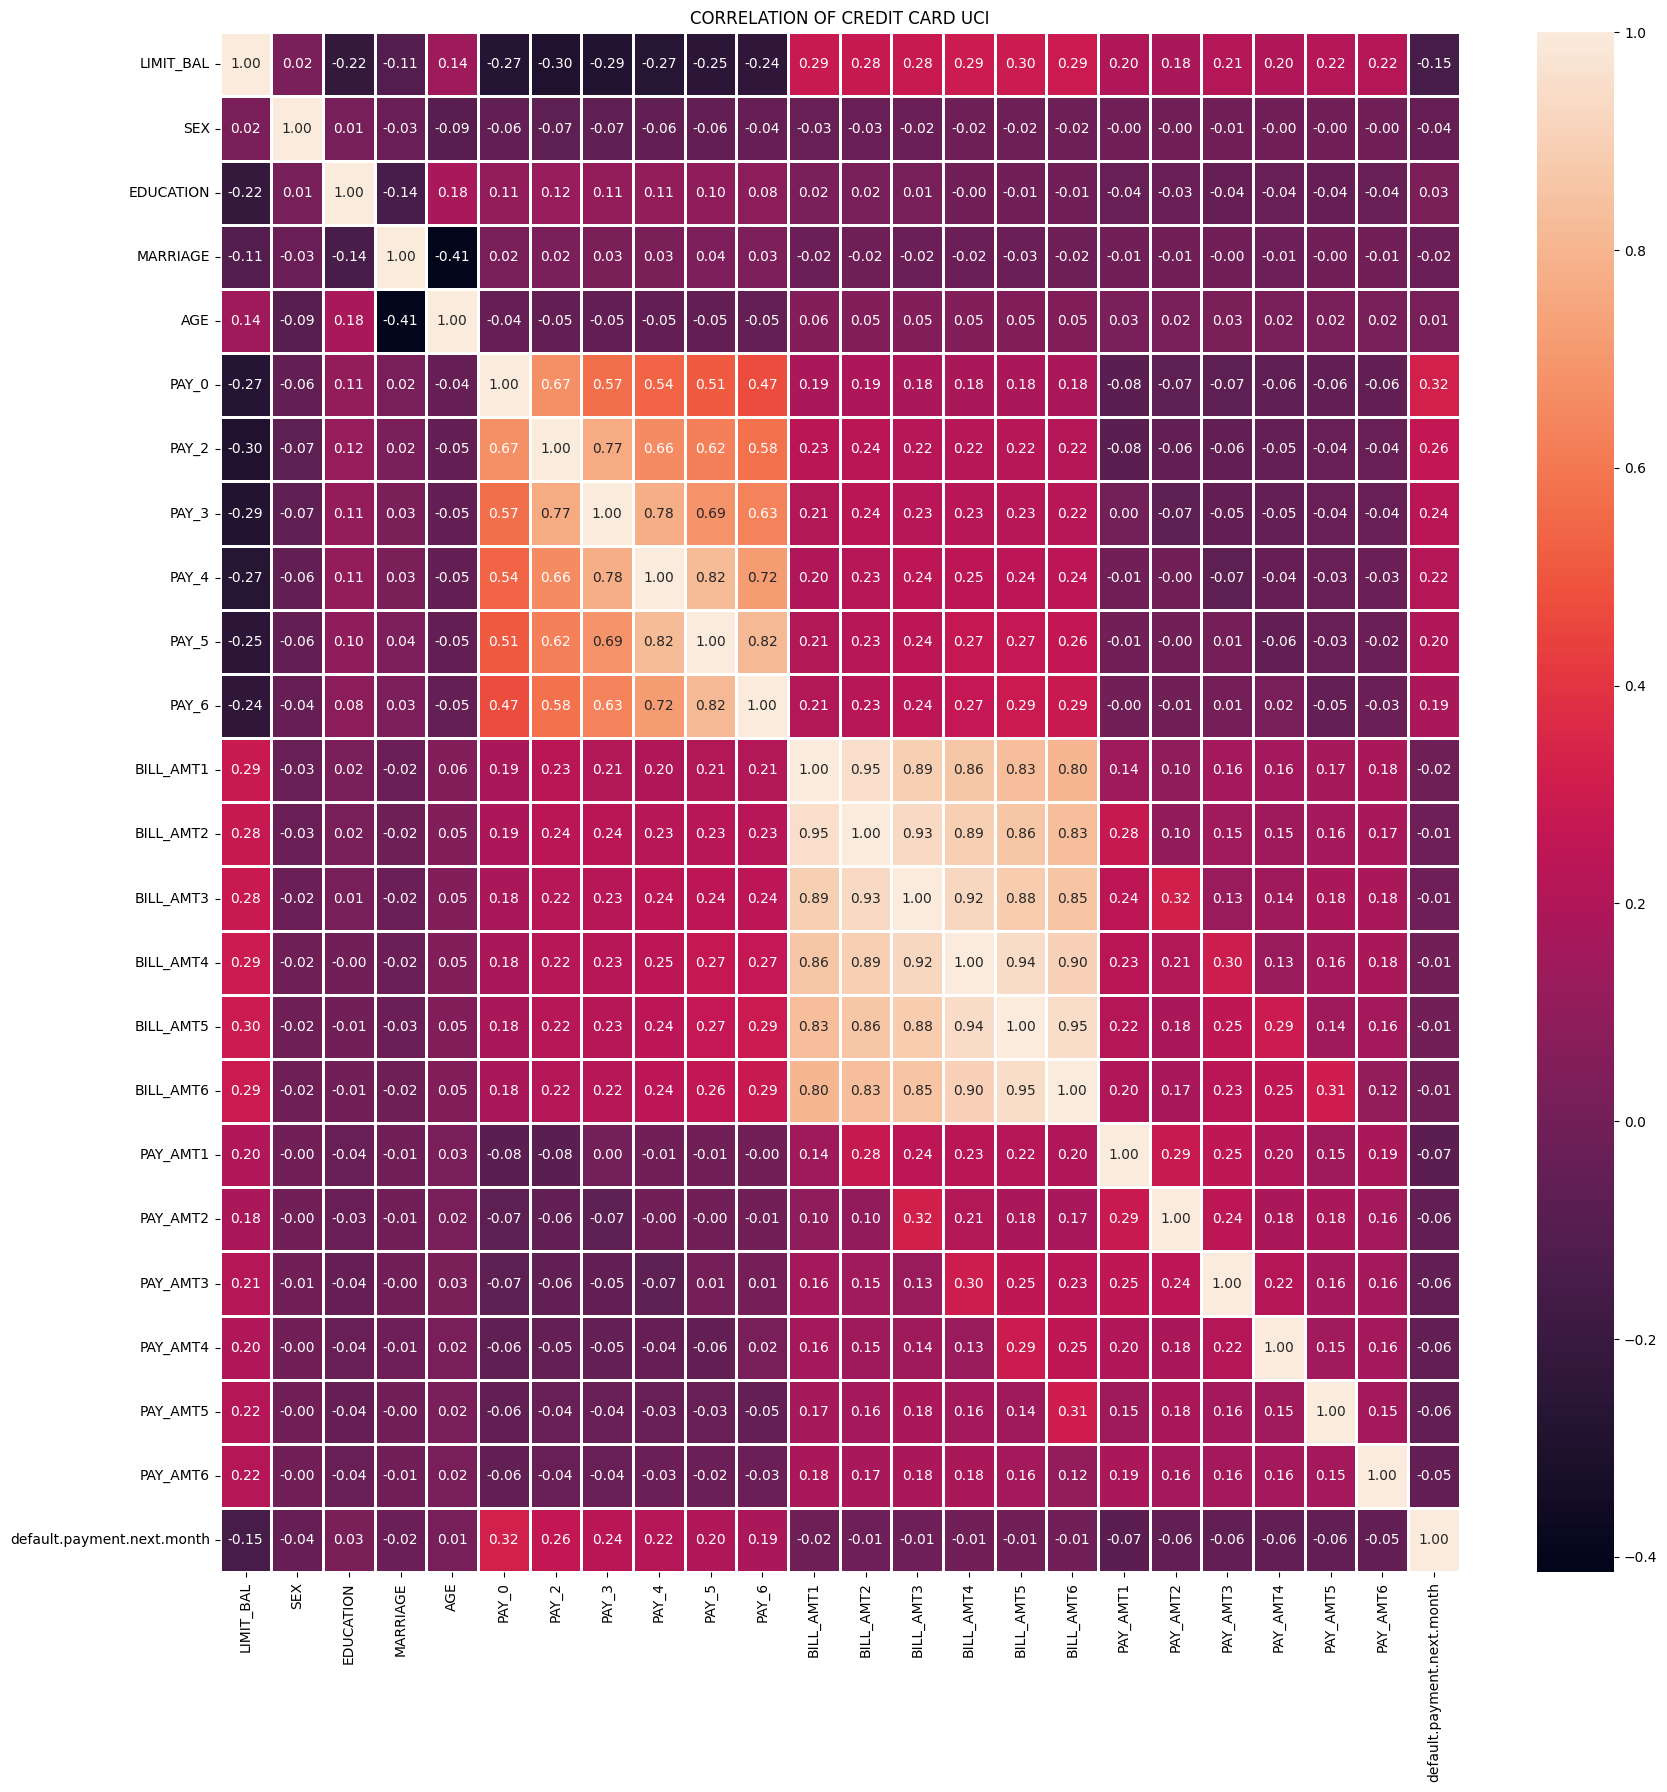

In [18]:
plt.figure(figsize = (20, 20))
sns.heatmap(credit_card_df.corr(), annot = True, fmt='.2f', linewidths = 1)
plt.title('CORRELATION OF CREDIT CARD UCI')
plt.show()

<Axes: xlabel='SEX', ylabel='LIMIT_BAL'>

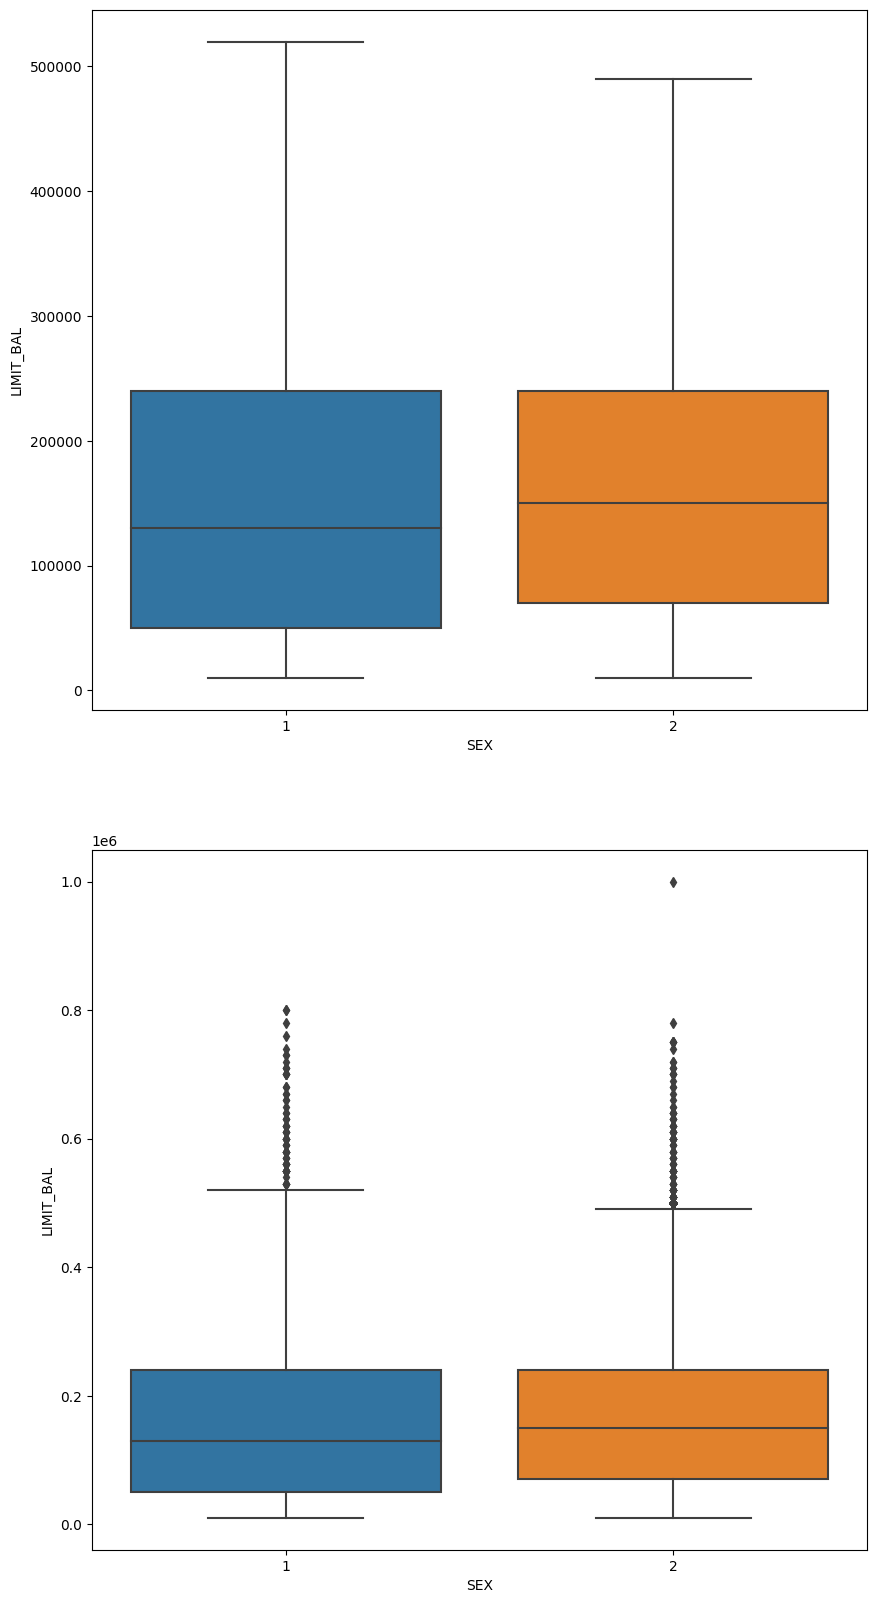

In [19]:
#plot box
plt.figure(figsize = [10, 20])
plt.subplot(211)
sns.boxplot(x = 'SEX', y = 'LIMIT_BAL', data = credit_card_df, showfliers = False)
plt.subplot(212)
sns.boxplot(x = 'SEX', y = 'LIMIT_BAL', data = credit_card_df)

In [20]:
#data kategori
X_category = credit_card_df[['SEX', 'EDUCATION', 'MARRIAGE']]
X_category

,SEX,EDUCATION,MARRIAGE
0,2,2,1
1,2,2,2
2,2,2,2
3,2,2,1
4,1,2,1
...,...,...,...
29995,1,3,1
29996,1,3,2
29997,1,2,2
29998,1,3,1


In [21]:
#melakukan encoding data x cat menjadi array
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_category = onehotencoder.fit_transform(X_category).toarray()

In [22]:
X_category.shape

(30000, 13)

In [23]:
X_category = pd.DataFrame(X_category)

In [24]:
X_category

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29996,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [25]:
#sekarang data kolom menjadi 13 kolomnya bukan hanya 3 kolom

In [26]:
#data numerikal dgn tdk memasukkan default_payment_next_month
X_num = credit_card_df[['AGE','LIMIT_BAL','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
X_num

,AGE,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,24,20000.0,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,26,120000.0,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,34,90000.0,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,37,50000.0,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,57,50000.0,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,39,220000.0,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,43,150000.0,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,37,30000.0,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,41,80000.0,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [27]:
#bisa dilihat dikolom diatas bahwa tidak terdapat kolom sex, age, dan marriage yg category dan default payment

In [28]:
#menggabungkan data x cat dan x num
X = pd.concat([X_category, X_num], axis = 1)
X.columns = X.columns.astype(str) #mengubah tipe kolom menjadi string
X

,0,1,2,3,4,5,6,7,8,9,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [29]:
#dilakukan penskalaan menggunakan metode normalisasi
#Normalisasi dilakukan untuk membuat nilai fitur berkisar antara 0 hingga 1.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X) #sumbu x

In [30]:
y = credit_card_df['default.payment.next.month']
y #sumbu y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default.payment.next.month, Length: 30000, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #20% untuk test, 80% untuk train

In [32]:
X_train.shape

(24000, 33)

In [33]:
X_test.shape

(6000, 33)

In [34]:
#Latih model klasifikasi XGBOOST
!pip install xgboost

In [35]:
import xgboost as xgb
model_xgb = xgb.XGBClassifier(learningrate = 0.1, max_depth = 20, use_label_encoder = False)
model_xgb.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[10:11:13] WARNING: ../src/learner.cc:767: 
Parameters: { "learningrate" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None,
              learningrate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=20,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [36]:
from sklearn.metrics import accuracy_score
y_predict = model_xgb.predict(X_test)

In [37]:
y_predict

array([0, 1, 0, ..., 0, 0, 0])

In [38]:
y_test

22488    0
16415    0
10197    0
25638    0
13492    0
        ..
23280    0
2381     0
22890    0
4725     0
19479    0
Name: default.payment.next.month, Length: 6000, dtype: int64

In [39]:
from sklearn.metrics import confusion_matrix, classification_report
print("Accuracy {} %".format(100*accuracy_score(y_test, y_predict)))

Accuracy 81.16666666666667 %


<Axes: >

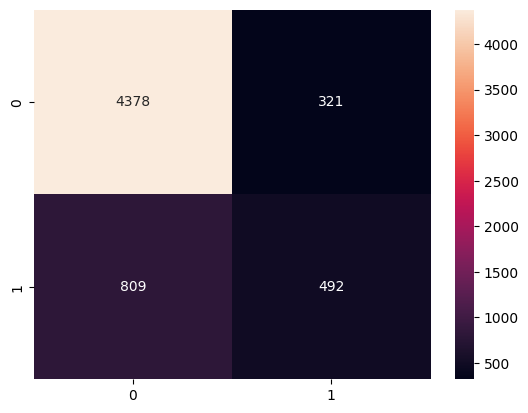

In [40]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True, fmt = 'd')

In [41]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89      4699
           1       0.61      0.38      0.47      1301

    accuracy                           0.81      6000
   macro avg       0.72      0.65      0.68      6000
weighted avg       0.79      0.81      0.79      6000



In [42]:
#Latih dan evaluasi model klasifikasi Support Vector Machine
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
model_svc = LinearSVC(max_iter = 100000)
model_svc = CalibratedClassifierCV(model_svc)
model_svc.fit(X_train, y_train)

CalibratedClassifierCV(estimator=LinearSVC(max_iter=100000))

In [44]:
y_predict = model_svc.predict(X_test)

In [45]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4699
           1       0.70      0.24      0.35      1301

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.80      0.81      0.77      6000



<Axes: >

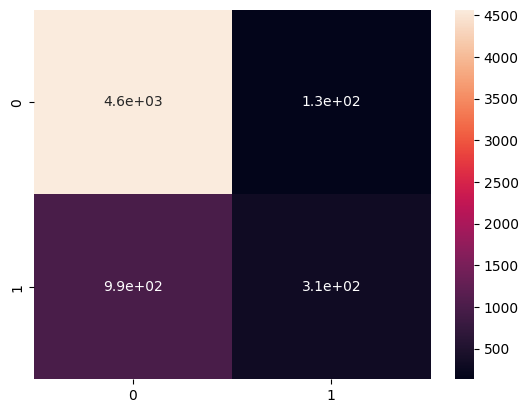

In [46]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot= True)

In [47]:
#Latih dan evaluasi model klasifikasi Naive Bayes
from sklearn.naive_bayes import GaussianNB
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)

GaussianNB()

In [48]:
y_predict = model_gnb.predict(X_test)

In [49]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.09      0.16      4699
           1       0.23      0.97      0.37      1301

    accuracy                           0.28      6000
   macro avg       0.58      0.53      0.27      6000
weighted avg       0.77      0.28      0.21      6000



<Axes: >

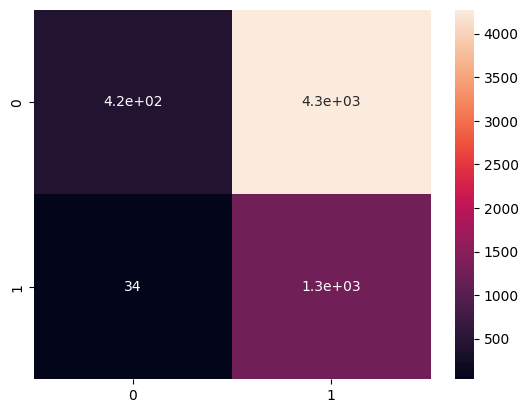

In [50]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot= True)

In [51]:
#Latih dan evaluasi model klasifikasi Logistic Regression
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
y_predict = model_lr.predict(X_test)

In [53]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4699
           1       0.70      0.23      0.35      1301

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



<Axes: >

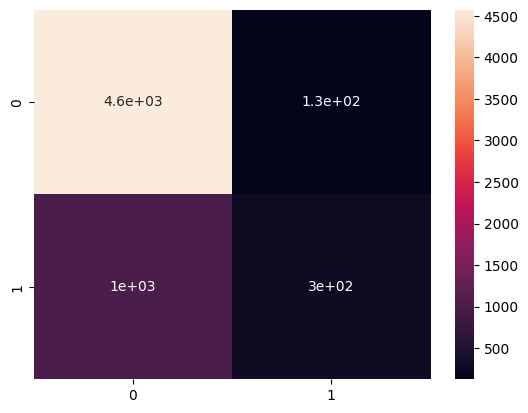

In [54]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

In [55]:
#Latih dan evaluasi model klasifikasi Random Forest
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [56]:
y_predict = model_rf.predict(X_test)

In [57]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4699
           1       0.65      0.37      0.47      1301

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



<Axes: >

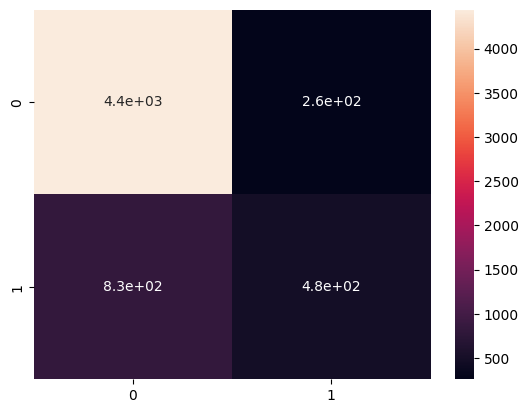

In [58]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

In [59]:
#Latih dan evaluasi model klasifikasi K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [60]:
y_predict = model_knn.predict(X_test)

In [61]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4699
           1       0.56      0.34      0.43      1301

    accuracy                           0.80      6000
   macro avg       0.70      0.63      0.65      6000
weighted avg       0.78      0.80      0.78      6000



<Axes: >

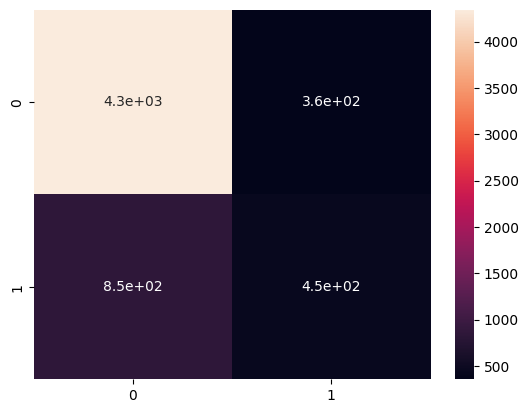

In [62]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

In [63]:
#Plot kurva ROC untuk seluruh model dan hitung nilai AUC
from sklearn.metrics import roc_curve
fpr0, tpr0, thresh0 = metrics.roc_curve(y_test, model_xgb.predict_proba(X_test)[:,1], pos_label = 1)
fpr1, tpr1, thresh1 = metrics.roc_curve(y_test, model_lr.predict_proba(X_test)[:,1], pos_label = 1)
fpr2, tpr2, thresh2 = metrics.roc_curve(y_test, model_svc.predict_proba(X_test)[:,1], pos_label = 1)
fpr3, tpr3, thresh3 = metrics.roc_curve(y_test, model_rf.predict_proba(X_test)[:,1], pos_label = 1)
fpr4, tpr4, thresh4 = metrics.roc_curve(y_test, model_knn.predict_proba(X_test)[:,1], pos_label = 1)
fpr5, tpr5, thresh5 = metrics.roc_curve(y_test, model_gnb.predict_proba(X_test)[:,1], pos_label = 1)

In [64]:
from sklearn.metrics import roc_auc_score
auc_score0 = roc_auc_score(y_test, model_xgb.predict_proba(X_test)[:,1])
auc_score1 = roc_auc_score(y_test, model_lr.predict_proba(X_test)[:,1])
auc_score2 = roc_auc_score(y_test, model_svc.predict_proba(X_test)[:,1])
auc_score3 = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:,1])
auc_score4 = roc_auc_score(y_test, model_knn.predict_proba(X_test)[:,1])
auc_score5 = roc_auc_score(y_test, model_gnb.predict_proba(X_test)[:,1])

In [65]:
print("xgb:", auc_score0)
print("lr:", auc_score1)
print("svc:", auc_score2)
print("rf:", auc_score3)
print("knn:", auc_score4)
print("gnb:", auc_score5)

xgb: 0.7469262189495566
lr: 0.7124269166792483
svc: 0.7109567034639814
rf: 0.7598794058755203
knn: 0.7053853347376804
gnb: 0.7297121454038906


Paling bagus nilai aoc ialah Random forest 75%, diikuti dengan XGBoost 74%, dan paling buruk KNNeighbor dengan 69%

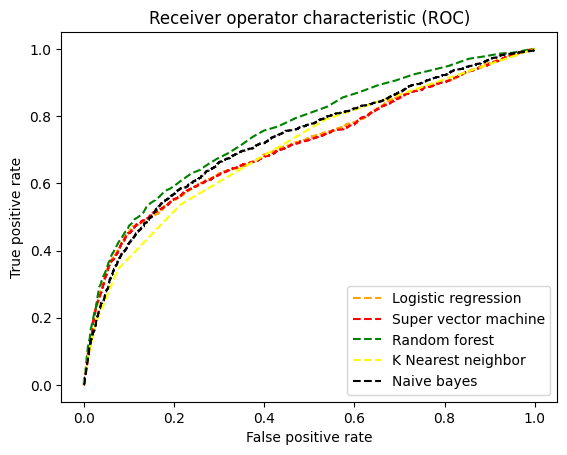

In [66]:
plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "Logistic regression")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "Super vector machine")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Random forest")
plt.plot(fpr4, tpr4, linestyle = "--", color = "yellow", label = "K Nearest neighbor")
plt.plot(fpr5, tpr5, linestyle = "--", color = "black", label = "Naive bayes")

plt.title('Receiver operator characteristic (ROC)')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

In [67]:
#Model mana yang berkinerja paling baik?

KESIMPULAN :untuk data ini yang paling bagus ialah Random Forest dan XGBoost. Namun bisa ditingkatkan lagi dengan melakukan berbagai optimasi model menggunakan hyperparameter, tau melakukan feature engineering, atau mengganti cara merepresentasikan featurenya dll.